<a href="https://colab.research.google.com/github/ValenNoble/Practica_3/blob/main/Practica_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Práctica 3**
Un dataset de NOAA está almacenado en el archivo data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv. Este es el dataset que utilizaremos para la práctica.

Cada fila en el archivo de datos corresponde a una sola observación.

Nos proporciona las siguientes variables:
- id : código de identificación de la estación
- date : fecha en formato YYYY-MM-DD (por ejemplo: 2012-01-24 = 24 de enero de 2012)
- element : indica el tipo de medición
 - TMAX : Temperatura máxima
 -TMIN : Temperatura mínima
- value: valor de la temperatura (en décimas de grados centígrados)


##Indicaciones
1. Lee la documentación y familiarícese con el conjunto de datos, luego escriba un código python que arroje un gráfico lineal de las temperaturas máximas y mínimas récord por día del año durante el período 2005-2014. El área entre las temperaturas máximas y mínimas récord de cada día debe estar sombreada.
2. Superponga una dispersión de los datos de 2015 para cualquier punto (máximos y mínimos) para los cuales se superó el récord de diez años (2005-2014) máximo o mínimo histórico en 2015.
3. Debes tener cuidado con los días bisiestos (es decir, el 29 de febrero), es totalmente razonable eliminar estos puntos del conjunto de datos para esta visualización.
4. ¡Haz que la imagen sea agradable! Considera problemas como leyendas, etiquetas y líneas en demasía.

Los datos proporcionados están cerca de Ann Arbor, Michigan, Estados Unidos, y las estaciones de donde provienen los datos se muestran en el siguiente mapa.

In [2]:
!git clone https://github.com/ValenNoble/Practica_3.git

Cloning into 'Practica_3'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 17 (delta 3), reused 9 (delta 0), pack-reused 0
Receiving objects: 100% (17/17), 921.93 KiB | 3.22 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/content/Practica_3/data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [ ]:
# Convierte la columna 'Date' al formato adecuado
df['Date'] = pd.to_datetime(df['Date'])

# Elimina los puntos de datos correspondientes al 29 de febrero
df = df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]

# Divide la columna 'Date' en 'Year' y 'Month_Day'
df['Year'] = df['Date'].dt.year
df['Month_Day'] = df['Date'].dt.strftime('%m-%d')

# Encuentra las temperaturas máximas y mínimas récord por día del año durante el período 2005-2014
df_max = df[(df['Year'] >= 2005) & (df['Year'] <= 2014) & (df['Element'] == 'TMAX')].groupby('Month_Day')['Data_Value'].max()
df_min = df[(df['Year'] >= 2005) & (df['Year'] <= 2014) & (df['Element'] == 'TMIN')].groupby('Month_Day')['Data_Value'].min()

#Encuentra los puntos de datos de 2015 que superaron los récords de diez años:
df_2015 = df[df['Year'] == 2015]

# Encuentra los puntos de datos de 2015 que superaron los récords de diez años máximos y mínimos
df_2015_max = df_2015[df_2015['Element'] == 'TMAX'].groupby('Month_Day')['Data_Value'].max()
df_2015_min = df_2015[df_2015['Element'] == 'TMIN'].groupby('Month_Day')['Data_Value'].min()

# Encuentra los puntos de datos de 2015 que superaron los récords de diez años máximos y mínimos históricos
record_high = np.where(df_2015_max > df_max)[0]
record_low = np.where(df_2015_min < df_min)[0]

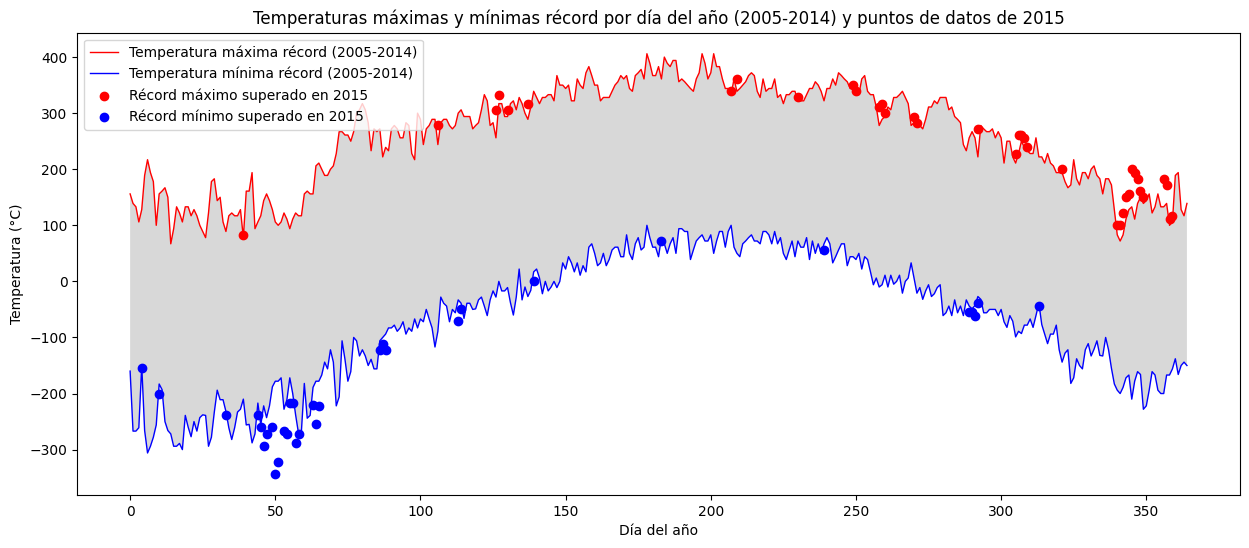

In [5]:
#Grafica los datos:
# Configura el tamaño de la figura
plt.figure(figsize = (15, 6))

# Grafica las temperaturas máximas y mínimas récord por día del año durante el período 2005-2014
plt.plot(df_max.values, color ='red', linewidth = 1, label = 'Temperatura máxima récord (2005-2014)')
plt.plot(df_min.values, color ='blue', linewidth = 1, label = 'Temperatura mínima récord (2005-2014)')

# Rellena el área entre las temperaturas máximas y mínimas récord de cada día
plt.fill_between(range(len(df_max)), df_max, df_min, facecolor = 'gray', alpha = 0.3)

# Grafica los puntos de datos de 2015 que superaron los récords de diez años
plt.scatter(record_high, df_2015_max.iloc[record_high], color = 'red', label = 'Récord máximo superado en 2015')
plt.scatter(record_low, df_2015_min.iloc[record_low], color = 'blue', label = 'Récord mínimo superado en 2015')

# Configura los ejes y las etiquetas
plt.xlabel('Día del año')
plt.ylabel('Temperatura (°C)')
plt.title('Temperaturas máximas y mínimas récord por día del año (2005-2014) y puntos de datos de 2015')
plt.legend(loc = 'upper left')

# Muestra la gráfica
plt.show()